In [88]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

In [61]:
from cheetah.multiclass.data import multiclass_balancer, get_augmented_and_test
from cheetah import data
from cheetah.params import *
from cheetah.mlflow import MLFlowBase
from cheetah.multiclass.pipeline import prepare_dataset, tf_train_val_split
from cheetah.utils import configure_for_performance

In [62]:
import tensorflow.keras.models as tfkm

In [91]:
def load_model():
    print("loading model: ")
#    if not 'model' in globals():
    #json_file = open(os.path.join('models', 'model_architecture.json'), 'r')
    #json_savedModel= json_file.read()
    #return tfkm.model_from_json(json_savedModel)
    model = tfkm.load_model('/home/noname/code/dncampo42/cheetah/models/ResNet50_multiclass_20220623_121940.h5')
    return model

#pre trained model to do predictions

model = load_model()

loading model: 


In [64]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 90, 120, 3)]      0         
                                                                 
 resnet50 (Functional)       (None, 3, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 7)                 14343     
                                                                 
Total params: 23,602,055
Trainable params: 23,548,935
Non-trainable params: 53,120
_________________________________________________________________


In [65]:
# load original data and get corresponding image paths

df = data.get_data()
df = data.path_to_metadata(df)
# load multiclass augmented images and prepare test list
aug_test_dict = get_augmented_and_test()

# balance classes + augmented classes images
train_df, test_df = multiclass_balancer(df, aug_test_dict,
                                        class_size=2000)

# prepare train_val and test dataset with extracted images and labels
test_ds = prepare_dataset(test_df)

In [67]:
aug_test_dict['test_df_df']

,lesion_id,image_id,dx,dx_type,age,sex,localization,path
0,HAM_0000720,ISIC_0028926,df,histo,65.0,male,upper extremity,raw_data/HAM10000_images_part_1/ISIC_0028926.jpg
1,HAM_0002895,ISIC_0029578,df,histo,60.0,male,lower extremity,raw_data/HAM10000_images_part_2/ISIC_0029578.jpg
2,HAM_0005983,ISIC_0025594,df,consensus,65.0,female,lower extremity,raw_data/HAM10000_images_part_1/ISIC_0025594.jpg
3,HAM_0006816,ISIC_0026254,df,consensus,45.0,male,lower extremity,raw_data/HAM10000_images_part_1/ISIC_0026254.jpg
4,HAM_0002129,ISIC_0025903,df,consensus,60.0,male,abdomen,raw_data/HAM10000_images_part_1/ISIC_0025903.jpg
5,HAM_0004496,ISIC_0028651,df,consensus,55.0,female,lower extremity,raw_data/HAM10000_images_part_1/ISIC_0028651.jpg
6,HAM_0002848,ISIC_0027598,df,consensus,60.0,female,lower extremity,raw_data/HAM10000_images_part_1/ISIC_0027598.jpg
7,HAM_0000049,ISIC_0029130,df,consensus,70.0,male,lower extremity,raw_data/HAM10000_images_part_1/ISIC_0029130.jpg
8,HAM_0007569,ISIC_0025373,df,consensus,35.0,female,lower extremity,raw_data/HAM10000_images_part_1/ISIC_0025373.jpg
9,HAM_0006707,ISIC_0030870,df,consensus,45.0,female,lower extremity,raw_data/HAM10000_images_part_2/ISIC_0030870.jpg


In [68]:
test = configure_for_performance(test_ds)

In [69]:
test.take(1).get_single_element()

2022-06-23 18:01:03.658269: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


(<tf.Tensor: shape=(32, 90, 120, 3), dtype=uint8, numpy=
 array([[[[212, 163, 159],
          [216, 171, 165],
          [222, 179, 173],
          ...,
          [228, 190, 189],
          [228, 191, 185],
          [224, 190, 181]],
 
         [[221, 171, 170],
          [222, 177, 172],
          [221, 179, 180],
          ...,
          [227, 190, 181],
          [229, 182, 176],
          [228, 183, 177]],
 
         [[221, 179, 180],
          [223, 183, 183],
          [223, 183, 184],
          ...,
          [227, 179, 175],
          [225, 178, 172],
          [224, 180, 169]],
 
         ...,
 
         [[221, 172, 168],
          [223, 176, 170],
          [221, 173, 169],
          ...,
          [222, 175, 167],
          [223, 183, 173],
          [226, 193, 188]],
 
         [[224, 176, 172],
          [221, 172, 165],
          [223, 178, 172],
          ...,
          [223, 179, 168],
          [226, 183, 174],
          [225, 192, 187]],
 
         [[222, 177, 171],


In [70]:
y_pred = model.predict(test)

In [71]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998 entries, 0 to 13
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     998 non-null    object 
 1   image_id      998 non-null    object 
 2   dx            998 non-null    object 
 3   dx_type       998 non-null    object 
 4   age           990 non-null    float64
 5   sex           998 non-null    object 
 6   localization  998 non-null    object 
 7   path          998 non-null    object 
 8   cat           998 non-null    int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 78.0+ KB


In [72]:
y_pred = np.argmax(y_pred, axis=1)

In [73]:
y_true=np.array(test_df['cat'])
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

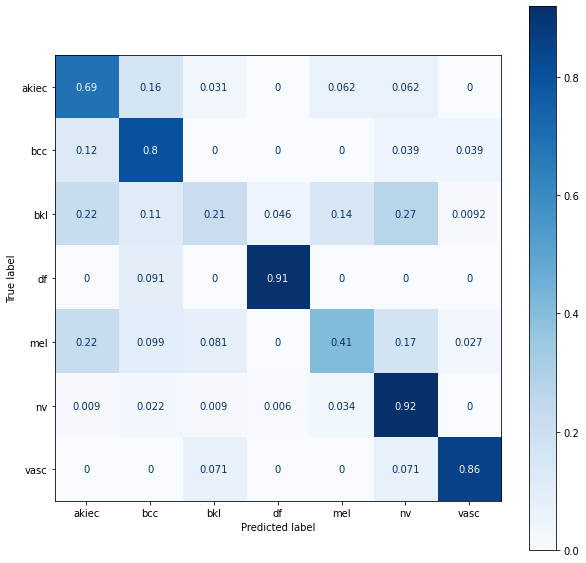

In [59]:
fig, ax = plt.subplots(figsize=(10, 10))
#plot_confusion_matrix(your_model, X_test, y_test, ax=ax)
disp = ConfusionMatrixDisplay.from_predictions(y_true, y_pred, normalize='true', 
                                               display_labels=test_df['dx'].unique(), ax=ax,
                                               #title="Confusion matrix categorical classification",
                                            cmap=plt.cm.Blues);




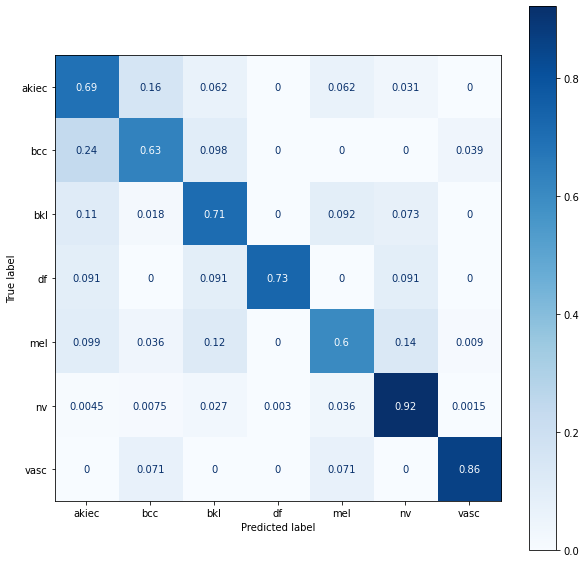

In [90]:
fig, ax = plt.subplots(figsize=(10, 10))
#plot_confusion_matrix(your_model, X_test, y_test, ax=ax)
disp = ConfusionMatrixDisplay.from_predictions(y_true, y_pred, normalize='true', 
                                               display_labels=test_df['dx'].unique(), ax=ax,
                                               #title="Confusion matrix categorical classification",
                                            cmap=plt.cm.Blues);


In [89]:
accuracy_score(y_true, y_pred)

0.8366733466933868

In [34]:
test_df['dx'].unique()

array(['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'], dtype=object)

In [77]:
def perf_measure(y_actual, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_pred)): 
        if y_actual[i]==y_pred[i]==1:
            TP += 1
        if y_pred[i]==1 and y_actual[i]!=y_pred[i]:
            FP += 1
        if y_actual[i]==y_pred[i]==0:
            TN += 1
        if y_pred[i]==0 and y_actual[i]!=y_pred[i]:
            FN += 1
    return (TP, FP, TN, FN)

In [79]:
perf_measure(y_true, y_pred)

(32, 17, 22, 39)

In [93]:
test_df['dx'].unique()

array(['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'], dtype=object)